# Neural Network (Desktop version)


With this Jupyter notebook we can execute several operation to create, load or test a funtional Neural Network.

This Notebook has been prepared to be used in your personal computer.

You will need the train and validation data from the gitub repository for some operations. You will need a poweful computer to train the network. If you don't have one it will take too long.

In any case, you can execute the static tests with the github neural network.

## The Neural Network Architecture

This first cell has important information for the neural network architecture as the dimensions of the images, the number of classes or the path to the training and validation images.

**Run this cell always**, it has information for all the notebook like the numpy import.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2

# Data pre-processing, dimensions of our images.
#img_width, img_height = 240, 135
img_width, img_height = 128, 72
#img_width, img_height = 96, 54

commonURL = ""
train_data_dir = commonURL + 'data/train'
validation_data_dir = commonURL + 'data/validation'

In this next cell you can see the architecture used in the Neural Network.

You don't need to run this cell, only if you want to train the model.

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import backend as K
from keras.applications import vgg16
from keras.optimizers import Adam
from keras.layers import Input

input_tensor = Input(shape=(img_width,img_height,3))

model = Sequential()
model.add(Conv2D(128, (10,10), padding='same', kernel_regularizer=regularizers.l2(0.0001), input_shape = (img_width, img_height,3)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (20,20), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (10,5), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (5,10), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 72, 128)      38528     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128, 72, 128)      512       
_________________________________________________________________
activation_9 (Activation)    (None, 128, 72, 128)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 72, 64)       3276864   
_________________________________________________________________
batch_normalization_10 (Batc (None, 128, 72, 64)       256       
_________________________________________________________________
activation_10 (Activation)   (None, 128, 72, 64)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 36, 64)        0         
__________

## Training

In this section we can train a new neural network or continue training an existing one.

In [8]:
nb_train_samples = 45000
nb_validation_samples = 4500
batch_size = 64
epochs = 5

In this cell we will upload the "data / train" data. There are many images, so ImageDataGenerator will be useful for that and will not break the computer's RAM. It is advisable to have checked the upper cells and made sure that the path where this folder is located is the correct one.

In [9]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator( rotation_range = 180)

# this is the augmentation configuration we will use for testing
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 44302 images belonging to 7 classes.
Found 2470 images belonging to 7 classes.


In this cell we will train our model. If we use model = load_model(commonURL + 'our_Neural_Network.h5') we can continue training a saved neural network.

In [0]:
# Training
import time
start = time.time()
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)
end = time.time()

model.save(commonURL + 'neural_network_checkpoint.h5')

Found 7226 images belonging to 6 classes.
Found 1941 images belonging to 6 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
390/390 [==============================] - 5741s 15s/step - loss: 0.4427 - acc: 0.8699 - val_loss: 11.2063 - val_acc: 0.2735
Epoch 2/10
390/390 [==============================] - 3482s 9s/step - loss: 0.1886 - acc: 0.9651 - val_loss: 5.7791 - val_acc: 0.6190
Epoch 3/10
390/390 [==============================] - 3471s 9s/step - loss: 0.1703 - acc: 0.9760 - val_loss: 6.6784 - val_acc: 0.5083
Epoch 4/10
390/390 [==============================] - 3472s 9s/step - loss: 0.1634 - acc: 0.9774 - val_loss: 5.8888 - val_acc: 0.5243
Epoch 5/10
390/390 [==============================] - 3471s 9s/step - loss: 0.1566 - acc: 0.9789 - val_loss: 6.2491 - val_acc: 0.5064
Epoch 6/10
390/390 [==============================] - 3472s 9s/step - loss: 0.1414 - acc: 0.9832 - val_loss: 10.3598 - val_acc: 0.3488
Epoch 7/10
390/390 [==============================] - 3464s 9

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=1)

print("Loss: ", score[0], "Accuracy: ", score[1])

plot_model_history(history)

print("Training MLP took " + str(end - start) + " seconds")

model.save(commonURL + 'neural_network.h5')

## Tests

In this section we can analyze the correct execution of our neural network.

With the cell below it is possible to delete the model stored in the memory of the notebook (if necessary) and in the next one you can load a saved neural network to test it.

In this static tests we can check the accuracy and create a confusion matrix to analyze the classification of each image in its respective node.

In [ ]:
del model

In [4]:
from keras.models import load_model
model = load_model(commonURL + 'neural_network.h5')

In [7]:
def lookForBest(prediction):
    best = 0
    categories = 6
    for i,probability in enumerate(prediction[0]):
        if probability > prediction[0][best]:
            best = i
    return best

def predictImg(img,realLabel,model):
    prediction = model.predict(img)
    print("\tReal label: \tNode" + str(realLabel) + " - " + str(prediction[0][realLabel]*100) + "%")
    best = lookForBest(prediction)
    print("\tPrediction: \tNode" + str(best) + " - " + str(prediction[0][best]*100) + "%")
    return best

import glob
import os,shutil

totalImages = 0
confusionMatrix = [
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0] 
    ]

for directory in glob.glob("data/validation/*"):
    label = int(directory.split("Nodo")[1]) - 1
    for imgUrl in glob.glob(directory + "/*"):
        print("Image: " + str(imgUrl))
        img = cv2.imread(imgUrl)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img).convert('RGB')
        img = img.rotate(180)
        img.thumbnail((img_width,img_height), Image.ANTIALIAS)
        img = np.rot90(img)
        img = Image.fromarray(img)
        img = np.expand_dims(img, axis=0)
        best = predictImg(img,label,model)
        totalImages = totalImages + 1
        confusionMatrix[label][best] = confusionMatrix[label][best] + 1
        print("Total Images: " + str(totalImages))
        print(confusionMatrix)

Image: data/validation\Nodo1\img1005.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 1
[[1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1011.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 2
[[2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1022.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 3
[[3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1025.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 4
[[4, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 

	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 30
[[30, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1181.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 31
[[31, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1182.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 32
[[32, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1183.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 33
[[33, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0

	Real label: 	Node0 - 99.99768733978271%
	Prediction: 	Node0 - 99.99768733978271%
Total Images: 58
[[55, 1, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1354.jpg
	Real label: 	Node0 - 99.99738931655884%
	Prediction: 	Node0 - 99.99738931655884%
Total Images: 59
[[56, 1, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img136.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 60
[[57, 1, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1363.jpg
	Real label: 	Node0 - 99.34220910072327%
	Prediction: 	Node0 - 99.34220910072327%
Total Images: 61
[[58, 1, 0, 0, 0,

	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 86
[[79, 1, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1540.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 87
[[80, 1, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1556.jpg
	Real label: 	Node0 - 99.99997615814209%
	Prediction: 	Node0 - 99.99997615814209%
Total Images: 88
[[81, 1, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1571.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 89
[[82, 1, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 

	Real label: 	Node0 - 99.99997615814209%
	Prediction: 	Node0 - 99.99997615814209%
Total Images: 114
[[105, 1, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1781.jpg
	Real label: 	Node0 - 99.99998807907104%
	Prediction: 	Node0 - 99.99998807907104%
Total Images: 115
[[106, 1, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1783.jpg
	Real label: 	Node0 - 99.99995231628418%
	Prediction: 	Node0 - 99.99995231628418%
Total Images: 116
[[107, 1, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo1\img1798.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 117
[[108, 1,

	Real label: 	Node1 - 99.99827146530151%
	Prediction: 	Node1 - 99.99827146530151%
Total Images: 142
[[112, 1, 0, 0, 0, 0, 8], [0, 21, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10164.jpg
	Real label: 	Node1 - 99.99771118164062%
	Prediction: 	Node1 - 99.99771118164062%
Total Images: 143
[[112, 1, 0, 0, 0, 0, 8], [0, 22, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10171.jpg
	Real label: 	Node1 - 99.90482926368713%
	Prediction: 	Node1 - 99.90482926368713%
Total Images: 144
[[112, 1, 0, 0, 0, 0, 8], [0, 23, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10183.jpg
	Real label: 	Node1 - 99.29237365722656%
	Prediction: 	Node1 - 99.2923736572265

	Real label: 	Node1 - 0.34823850728571415%
	Prediction: 	Node6 - 99.65176582336426%
Total Images: 169
[[112, 1, 0, 0, 0, 0, 8], [0, 44, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10397.jpg
	Real label: 	Node1 - 99.99521970748901%
	Prediction: 	Node1 - 99.99521970748901%
Total Images: 170
[[112, 1, 0, 0, 0, 0, 8], [0, 45, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10400.jpg
	Real label: 	Node1 - 99.97851252555847%
	Prediction: 	Node1 - 99.97851252555847%
Total Images: 171
[[112, 1, 0, 0, 0, 0, 8], [0, 46, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10424.jpg
	Real label: 	Node1 - 99.99963045120239%
	Prediction: 	Node1 - 99.99963045120

	Real label: 	Node1 - 96.53627872467041%
	Prediction: 	Node1 - 96.53627872467041%
Total Images: 196
[[112, 1, 0, 0, 0, 0, 8], [6, 65, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10572.jpg
	Real label: 	Node1 - 99.84935522079468%
	Prediction: 	Node1 - 99.84935522079468%
Total Images: 197
[[112, 1, 0, 0, 0, 0, 8], [6, 66, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10574.jpg
	Real label: 	Node1 - 99.72466230392456%
	Prediction: 	Node1 - 99.72466230392456%
Total Images: 198
[[112, 1, 0, 0, 0, 0, 8], [6, 67, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10584.jpg
	Real label: 	Node1 - 99.99946355819702%
	Prediction: 	Node1 - 99.9994635581970

	Real label: 	Node1 - 76.7293930053711%
	Prediction: 	Node1 - 76.7293930053711%
Total Images: 223
[[112, 1, 0, 0, 0, 0, 8], [6, 92, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10759.jpg
	Real label: 	Node1 - 97.5145936012268%
	Prediction: 	Node1 - 97.5145936012268%
Total Images: 224
[[112, 1, 0, 0, 0, 0, 8], [6, 93, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10764.jpg
	Real label: 	Node1 - 96.56833410263062%
	Prediction: 	Node1 - 96.56833410263062%
Total Images: 225
[[112, 1, 0, 0, 0, 0, 8], [6, 94, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10768.jpg
	Real label: 	Node1 - 99.74852800369263%
	Prediction: 	Node1 - 99.74852800369263%
T

	Real label: 	Node1 - 99.92766976356506%
	Prediction: 	Node1 - 99.92766976356506%
Total Images: 251
[[112, 1, 0, 0, 0, 0, 8], [6, 120, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10873.jpg
	Real label: 	Node1 - 99.8540997505188%
	Prediction: 	Node1 - 99.8540997505188%
Total Images: 252
[[112, 1, 0, 0, 0, 0, 8], [6, 121, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10874.jpg
	Real label: 	Node1 - 99.96254444122314%
	Prediction: 	Node1 - 99.96254444122314%
Total Images: 253
[[112, 1, 0, 0, 0, 0, 8], [6, 122, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img10880.jpg
	Real label: 	Node1 - 99.8923122882843%
	Prediction: 	Node1 - 99.8923122882843

	Real label: 	Node1 - 0.1759693375788629%
	Prediction: 	Node6 - 99.66937303543091%
Total Images: 278
[[112, 1, 0, 0, 0, 0, 8], [6, 141, 0, 0, 0, 0, 10], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img11047.jpg
	Real label: 	Node1 - 99.99992847442627%
	Prediction: 	Node1 - 99.99992847442627%
Total Images: 279
[[112, 1, 0, 0, 0, 0, 8], [6, 142, 0, 0, 0, 0, 10], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img11049.jpg
	Real label: 	Node1 - 99.9991774559021%
	Prediction: 	Node1 - 99.9991774559021%
Total Images: 280
[[112, 1, 0, 0, 0, 0, 8], [6, 143, 0, 0, 0, 0, 10], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img11069.jpg
	Real label: 	Node1 - 99.93034601211548%
	Prediction: 	Node1 - 99.93034601

	Real label: 	Node1 - 99.11934733390808%
	Prediction: 	Node1 - 99.11934733390808%
Total Images: 305
[[112, 1, 0, 0, 0, 0, 8], [6, 168, 0, 0, 0, 0, 10], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img11172.jpg
	Real label: 	Node1 - 99.21952486038208%
	Prediction: 	Node1 - 99.21952486038208%
Total Images: 306
[[112, 1, 0, 0, 0, 0, 8], [6, 169, 0, 0, 0, 0, 10], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img11174.jpg
	Real label: 	Node1 - 98.9941656589508%
	Prediction: 	Node1 - 98.9941656589508%
Total Images: 307
[[112, 1, 0, 0, 0, 0, 8], [6, 170, 0, 0, 0, 0, 10], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img11187.jpg
	Real label: 	Node1 - 99.933260679245%
	Prediction: 	Node1 - 99.93326067924

	Real label: 	Node1 - 99.9472439289093%
	Prediction: 	Node1 - 99.9472439289093%
Total Images: 332
[[112, 1, 0, 0, 0, 0, 8], [8, 186, 0, 0, 0, 7, 10], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img11331.jpg
	Real label: 	Node1 - 99.95703101158142%
	Prediction: 	Node1 - 99.95703101158142%
Total Images: 333
[[112, 1, 0, 0, 0, 0, 8], [8, 187, 0, 0, 0, 7, 10], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img11337.jpg
	Real label: 	Node1 - 99.99251365661621%
	Prediction: 	Node1 - 99.99251365661621%
Total Images: 334
[[112, 1, 0, 0, 0, 0, 8], [8, 188, 0, 0, 0, 7, 10], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo2\img11347.jpg
	Real label: 	Node1 - 99.99898672103882%
	Prediction: 	Node1 - 99.998986721

	Real label: 	Node2 - 4.672789201140404%
	Prediction: 	Node5 - 95.27608752250671%
Total Images: 359
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 6, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img11914.jpg
	Real label: 	Node2 - 20.27566283941269%
	Prediction: 	Node5 - 79.58194017410278%
Total Images: 360
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 6, 0, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img11917.jpg
	Real label: 	Node2 - 16.615793108940125%
	Prediction: 	Node5 - 83.25912952423096%
Total Images: 361
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 6, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img11925.jpg
	Real label: 	Node2 - 95.64186930656433%
	Prediction: 	Node2 - 95.641869

	Real label: 	Node2 - 99.99878406524658%
	Prediction: 	Node2 - 99.99878406524658%
Total Images: 386
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 30, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12068.jpg
	Real label: 	Node2 - 99.99880790710449%
	Prediction: 	Node2 - 99.99880790710449%
Total Images: 387
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 31, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12077.jpg
	Real label: 	Node2 - 99.99719858169556%
	Prediction: 	Node2 - 99.99719858169556%
Total Images: 388
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 32, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12087.jpg
	Real label: 	Node2 - 99.99996423721313%
	Prediction: 	Node2 - 99.9999

	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 414
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 58, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12261.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 415
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 59, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12266.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 416
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 60, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12278.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 417
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 61, 0, 

	Real label: 	Node2 - 99.17477369308472%
	Prediction: 	Node2 - 99.17477369308472%
Total Images: 442
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 86, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12471.jpg
	Real label: 	Node2 - 99.12375211715698%
	Prediction: 	Node2 - 99.12375211715698%
Total Images: 443
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 87, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12483.jpg
	Real label: 	Node2 - 99.81523156166077%
	Prediction: 	Node2 - 99.81523156166077%
Total Images: 444
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 88, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12484.jpg
	Real label: 	Node2 - 99.76649284362793%
	Prediction: 	Node2 - 99.7664

	Real label: 	Node2 - 99.02470111846924%
	Prediction: 	Node2 - 99.02470111846924%
Total Images: 469
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 113, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12668.jpg
	Real label: 	Node2 - 95.42754292488098%
	Prediction: 	Node2 - 95.42754292488098%
Total Images: 470
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 114, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12670.jpg
	Real label: 	Node2 - 93.23567748069763%
	Prediction: 	Node2 - 93.23567748069763%
Total Images: 471
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 115, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12683.jpg
	Real label: 	Node2 - 97.36788868904114%
	Prediction: 	Node2 - 97.3

	Real label: 	Node2 - 97.2000241279602%
	Prediction: 	Node2 - 97.2000241279602%
Total Images: 496
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 139, 0, 0, 7, 1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12853.jpg
	Real label: 	Node2 - 98.26166033744812%
	Prediction: 	Node2 - 98.26166033744812%
Total Images: 497
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 140, 0, 0, 7, 1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12864.jpg
	Real label: 	Node2 - 98.89272451400757%
	Prediction: 	Node2 - 98.89272451400757%
Total Images: 498
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 141, 0, 0, 7, 1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img12868.jpg
	Real label: 	Node2 - 90.9501314163208%
	Prediction: 	Node2 - 90.9501

	Real label: 	Node2 - 98.05702567100525%
	Prediction: 	Node2 - 98.05702567100525%
Total Images: 523
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 161, 0, 5, 7, 1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13053.jpg
	Real label: 	Node2 - 92.54540801048279%
	Prediction: 	Node2 - 92.54540801048279%
Total Images: 524
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 162, 0, 5, 7, 1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13072.jpg
	Real label: 	Node2 - 99.83817338943481%
	Prediction: 	Node2 - 99.83817338943481%
Total Images: 525
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 163, 0, 5, 7, 1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13082.jpg
	Real label: 	Node2 - 99.96612071990967%
	Prediction: 	Node2 - 99.9

	Real label: 	Node2 - 99.99974966049194%
	Prediction: 	Node2 - 99.99974966049194%
Total Images: 550
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 188, 0, 5, 7, 1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13274.jpg
	Real label: 	Node2 - 99.99998807907104%
	Prediction: 	Node2 - 99.99998807907104%
Total Images: 551
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 189, 0, 5, 7, 1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13278.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 552
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 190, 0, 5, 7, 1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13282.jpg
	Real label: 	Node2 - 99.99997615814209%
	Prediction: 	Node2 - 99.99997615814209%
Total Ima

	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 577
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 201, 0, 5, 7, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13451.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 578
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 202, 0, 5, 7, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13452.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 579
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 203, 0, 5, 7, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13459.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 580
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 2

	Real label: 	Node2 - 99.8210072517395%
	Prediction: 	Node2 - 99.8210072517395%
Total Images: 604
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 226, 0, 5, 9, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13621.jpg
	Real label: 	Node2 - 96.31178379058838%
	Prediction: 	Node2 - 96.31178379058838%
Total Images: 605
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 227, 0, 5, 9, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13627.jpg
	Real label: 	Node2 - 99.94791150093079%
	Prediction: 	Node2 - 99.94791150093079%
Total Images: 606
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 228, 0, 5, 9, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13629.jpg
	Real label: 	Node2 - 99.9651551246643%
	Prediction: 	Node2 - 99.9

	Real label: 	Node2 - 99.99520778656006%
	Prediction: 	Node2 - 99.99520778656006%
Total Images: 631
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 253, 0, 5, 9, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13820.jpg
	Real label: 	Node2 - 99.99783039093018%
	Prediction: 	Node2 - 99.99783039093018%
Total Images: 632
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 254, 0, 5, 9, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13823.jpg
	Real label: 	Node2 - 99.98948574066162%
	Prediction: 	Node2 - 99.98948574066162%
Total Images: 633
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 255, 0, 5, 9, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13844.jpg
	Real label: 	Node2 - 99.9994158744812%
	Prediction: 	Node2 - 99

	Real label: 	Node2 - 94.04895305633545%
	Prediction: 	Node2 - 94.04895305633545%
Total Images: 658
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 280, 0, 5, 9, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13978.jpg
	Real label: 	Node2 - 99.3922770023346%
	Prediction: 	Node2 - 99.3922770023346%
Total Images: 659
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 281, 0, 5, 9, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13980.jpg
	Real label: 	Node2 - 99.80814456939697%
	Prediction: 	Node2 - 99.80814456939697%
Total Images: 660
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 282, 0, 5, 9, 15], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo3\img13983.jpg
	Real label: 	Node2 - 99.95637536048889%
	Prediction: 	Node2 - 99.

	Real label: 	Node3 - 99.99998807907104%
	Prediction: 	Node3 - 99.99998807907104%
Total Images: 685
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 0, 0, 20, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img16580.jpg
	Real label: 	Node3 - 99.99963045120239%
	Prediction: 	Node3 - 99.99963045120239%
Total Images: 686
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 0, 0, 21, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img16582.jpg
	Real label: 	Node3 - 99.98522996902466%
	Prediction: 	Node3 - 99.98522996902466%
Total Images: 687
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 0, 0, 22, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img16584.jpg
	Real label: 	Node3 - 99.99650716781616%
	Prediction: 	Node3 

	Real label: 	Node3 - 0.6861272733658552%
	Prediction: 	Node6 - 93.09917688369751%
Total Images: 712
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 0, 0, 40, 3, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img16786.jpg
	Real label: 	Node3 - 0.8393987081944942%
	Prediction: 	Node6 - 62.32577562332153%
Total Images: 713
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 0, 0, 40, 3, 0, 5], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img16800.jpg
	Real label: 	Node3 - 0.9105817414820194%
	Prediction: 	Node1 - 87.12920546531677%
Total Images: 714
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 1, 0, 40, 3, 0, 5], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img16801.jpg
	Real label: 	Node3 - 0.10389641392976046%
	Prediction: 	N

	Real label: 	Node3 - 99.83692765235901%
	Prediction: 	Node3 - 99.83692765235901%
Total Images: 739
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 3, 0, 61, 4, 0, 6], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img16959.jpg
	Real label: 	Node3 - 99.09698367118835%
	Prediction: 	Node3 - 99.09698367118835%
Total Images: 740
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 3, 0, 62, 4, 0, 6], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img16966.jpg
	Real label: 	Node3 - 81.29457235336304%
	Prediction: 	Node3 - 81.29457235336304%
Total Images: 741
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 3, 0, 63, 4, 0, 6], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img16978.jpg
	Real label: 	Node3 - 99.8384952545166%
	Prediction: 	Node3 -

	Real label: 	Node3 - 1.661698405541756e-05%
	Prediction: 	Node4 - 99.98425245285034%
Total Images: 766
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 7, 0, 73, 13, 0, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17133.jpg
	Real label: 	Node3 - 3.937138970400156e-06%
	Prediction: 	Node4 - 99.99673366546631%
Total Images: 767
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 7, 0, 73, 14, 0, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17136.jpg
	Real label: 	Node3 - 1.1982457692738535e-05%
	Prediction: 	Node4 - 99.61961507797241%
Total Images: 768
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 7, 0, 73, 15, 0, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17137.jpg
	Real label: 	Node3 - 1.782944991646218e-05%


	Real label: 	Node3 - 0.00020506367945927195%
	Prediction: 	Node4 - 99.97429251670837%
Total Images: 793
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 7, 0, 84, 28, 1, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17303.jpg
	Real label: 	Node3 - 0.0009967729965865146%
	Prediction: 	Node4 - 99.89757537841797%
Total Images: 794
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 7, 0, 84, 29, 1, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17311.jpg
	Real label: 	Node3 - 0.0016391606550314464%
	Prediction: 	Node4 - 99.82081651687622%
Total Images: 795
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 7, 0, 84, 30, 1, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17313.jpg
	Real label: 	Node3 - 0.004833206548937596%
	

	Real label: 	Node3 - 0.2968739252537489%
	Prediction: 	Node4 - 99.70183372497559%
Total Images: 819
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 87, 40, 1, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17440.jpg
	Real label: 	Node3 - 3.532956913113594%
	Prediction: 	Node4 - 96.4637041091919%
Total Images: 820
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 87, 41, 1, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17458.jpg
	Real label: 	Node3 - 16.14817976951599%
	Prediction: 	Node4 - 80.21738529205322%
Total Images: 821
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 87, 42, 1, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17473.jpg
	Real label: 	Node3 - 6.638694003413548e-05%
	Predictio

	Real label: 	Node3 - 99.73318576812744%
	Prediction: 	Node3 - 99.73318576812744%
Total Images: 846
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 105, 49, 1, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17670.jpg
	Real label: 	Node3 - 99.47732090950012%
	Prediction: 	Node3 - 99.47732090950012%
Total Images: 847
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 106, 49, 1, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17675.jpg
	Real label: 	Node3 - 99.47603344917297%
	Prediction: 	Node3 - 99.47603344917297%
Total Images: 848
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 107, 49, 1, 8], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17679.jpg
	Real label: 	Node3 - 99.83482360839844%
	Prediction

	Real label: 	Node3 - 0.011261065810685977%
	Prediction: 	Node6 - 99.92550015449524%
Total Images: 872
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 119, 49, 1, 20], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17804.jpg
	Real label: 	Node3 - 4.086762294173241%
	Prediction: 	Node6 - 56.464189291000366%
Total Images: 873
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 119, 49, 1, 21], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17816.jpg
	Real label: 	Node3 - 0.020499606034718454%
	Prediction: 	Node4 - 88.6620819568634%
Total Images: 874
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 119, 50, 1, 21], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17832.jpg
	Real label: 	Node3 - 0.023172100191004574%

	Real label: 	Node3 - 1.3244536489764869e-05%
	Prediction: 	Node6 - 99.99996423721313%
Total Images: 898
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 119, 56, 1, 39], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17983.jpg
	Real label: 	Node3 - 0.0004250613073963905%
	Prediction: 	Node6 - 99.96824264526367%
Total Images: 899
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 119, 56, 1, 40], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17987.jpg
	Real label: 	Node3 - 0.011207738862140104%
	Prediction: 	Node6 - 85.87144613265991%
Total Images: 900
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 119, 56, 1, 41], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img17990.jpg
	Real label: 	Node3 - 0.0203237053938

	Real label: 	Node3 - 0.005012567635276355%
	Prediction: 	Node6 - 99.24970865249634%
Total Images: 924
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 134, 57, 1, 49], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18156.jpg
	Real label: 	Node3 - 0.001325453104072949%
	Prediction: 	Node6 - 99.86938834190369%
Total Images: 925
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 134, 57, 1, 50], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18172.jpg
	Real label: 	Node3 - 0.009026093903230503%
	Prediction: 	Node6 - 99.97705817222595%
Total Images: 926
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 0, 134, 57, 1, 51], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18174.jpg
	Real label: 	Node3 - 0.0085492967627942

	Real label: 	Node3 - 0.6320600397884846%
	Prediction: 	Node6 - 99.36307072639465%
Total Images: 950
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 5, 145, 57, 1, 59], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18298.jpg
	Real label: 	Node3 - 2.2434198854170972e-05%
	Prediction: 	Node4 - 98.34291934967041%
Total Images: 951
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 5, 145, 58, 1, 59], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18310.jpg
	Real label: 	Node3 - 0.004300641012378037%
	Prediction: 	Node2 - 84.65191721916199%
Total Images: 952
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 145, 58, 1, 59], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18316.jpg
	Real label: 	Node3 - 0.0663136772345751

	Real label: 	Node3 - 92.02094078063965%
	Prediction: 	Node3 - 92.02094078063965%
Total Images: 976
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 153, 60, 1, 73], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18453.jpg
	Real label: 	Node3 - 66.54428243637085%
	Prediction: 	Node3 - 66.54428243637085%
Total Images: 977
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 154, 60, 1, 73], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18462.jpg
	Real label: 	Node3 - 99.46826100349426%
	Prediction: 	Node3 - 99.46826100349426%
Total Images: 978
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 155, 60, 1, 73], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18465.jpg
	Real label: 	Node3 - 35.83412170410156%
	Predict

	Real label: 	Node3 - 32.91764557361603%
	Prediction: 	Node6 - 67.08235144615173%
Total Images: 1002
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 155, 64, 1, 93], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18649.jpg
	Real label: 	Node3 - 27.24941074848175%
	Prediction: 	Node6 - 72.75058627128601%
Total Images: 1003
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 155, 64, 1, 94], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18667.jpg
	Real label: 	Node3 - 96.8163013458252%
	Prediction: 	Node3 - 96.8163013458252%
Total Images: 1004
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 156, 64, 1, 94], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo4\img18672.jpg
	Real label: 	Node3 - 99.36293959617615%
	Predic

	Real label: 	Node4 - 1.1033589020371437%
	Prediction: 	Node6 - 98.35711717605591%
Total Images: 1028
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [0, 0, 0, 0, 17, 0, 6], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img22593.jpg
	Real label: 	Node4 - 0.3193277632817626%
	Prediction: 	Node5 - 86.0916793346405%
Total Images: 1029
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [0, 0, 0, 0, 17, 1, 6], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img22596.jpg
	Real label: 	Node4 - 0.10086555266752839%
	Prediction: 	Node5 - 94.31731104850769%
Total Images: 1030
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [0, 0, 0, 0, 17, 2, 6], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img22618.jpg
	Real label: 	Node4 - 99.9923586845398%


	Real label: 	Node4 - 16.131886839866638%
	Prediction: 	Node6 - 74.45723414421082%
Total Images: 1054
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 1, 0, 0, 38, 2, 7], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img22775.jpg
	Real label: 	Node4 - 46.90788686275482%
	Prediction: 	Node4 - 46.90788686275482%
Total Images: 1055
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 1, 0, 0, 39, 2, 7], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img22776.jpg
	Real label: 	Node4 - 31.873947381973267%
	Prediction: 	Node1 - 57.67221450805664%
Total Images: 1056
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 2, 0, 0, 39, 2, 7], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img22778.jpg
	Real label: 	Node4 - 15.881766378879547%

	Real label: 	Node4 - 96.7937707901001%
	Prediction: 	Node4 - 96.7937707901001%
Total Images: 1080
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 4, 0, 0, 61, 2, 7], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img22913.jpg
	Real label: 	Node4 - 92.00100302696228%
	Prediction: 	Node4 - 92.00100302696228%
Total Images: 1081
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 4, 0, 0, 62, 2, 7], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img22918.jpg
	Real label: 	Node4 - 83.16367864608765%
	Prediction: 	Node4 - 83.16367864608765%
Total Images: 1082
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 4, 0, 0, 63, 2, 7], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img22924.jpg
	Real label: 	Node4 - 79.05012369155884%
	Pre

	Real label: 	Node4 - 99.87727999687195%
	Prediction: 	Node4 - 99.87727999687195%
Total Images: 1106
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 4, 0, 0, 77, 2, 17], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23136.jpg
	Real label: 	Node4 - 99.77927207946777%
	Prediction: 	Node4 - 99.77927207946777%
Total Images: 1107
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 4, 0, 0, 78, 2, 17], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23143.jpg
	Real label: 	Node4 - 0.7267268840223551%
	Prediction: 	Node1 - 97.73362278938293%
Total Images: 1108
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 5, 0, 0, 78, 2, 17], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23144.jpg
	Real label: 	Node4 - 0.140466063749045

	Real label: 	Node4 - 99.99880790710449%
	Prediction: 	Node4 - 99.99880790710449%
Total Images: 1132
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 89, 4, 20], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23274.jpg
	Real label: 	Node4 - 99.99915361404419%
	Prediction: 	Node4 - 99.99915361404419%
Total Images: 1133
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 90, 4, 20], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23281.jpg
	Real label: 	Node4 - 99.9998688697815%
	Prediction: 	Node4 - 99.9998688697815%
Total Images: 1134
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 91, 4, 20], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23282.jpg
	Real label: 	Node4 - 99.99992847442627

	Real label: 	Node4 - 99.96862411499023%
	Prediction: 	Node4 - 99.96862411499023%
Total Images: 1158
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 112, 4, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23535.jpg
	Real label: 	Node4 - 99.6613085269928%
	Prediction: 	Node4 - 99.6613085269928%
Total Images: 1159
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 113, 4, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23540.jpg
	Real label: 	Node4 - 61.84362769126892%
	Prediction: 	Node4 - 61.84362769126892%
Total Images: 1160
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 114, 4, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23552.jpg
	Real label: 	Node4 - 98.93938899040

	Real label: 	Node4 - 99.96627569198608%
	Prediction: 	Node4 - 99.96627569198608%
Total Images: 1185
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 139, 4, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23702.jpg
	Real label: 	Node4 - 86.98363900184631%
	Prediction: 	Node4 - 86.98363900184631%
Total Images: 1186
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 140, 4, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23712.jpg
	Real label: 	Node4 - 99.91538524627686%
	Prediction: 	Node4 - 99.91538524627686%
Total Images: 1187
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 141, 4, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23720.jpg
	Real label: 	Node4 - 99.344938993

	Real label: 	Node4 - 99.99878406524658%
	Prediction: 	Node4 - 99.99878406524658%
Total Images: 1211
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 164, 5, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23924.jpg
	Real label: 	Node4 - 99.95868802070618%
	Prediction: 	Node4 - 99.95868802070618%
Total Images: 1212
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 165, 5, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23931.jpg
	Real label: 	Node4 - 99.98750686645508%
	Prediction: 	Node4 - 99.98750686645508%
Total Images: 1213
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 1, 166, 5, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img23962.jpg
	Real label: 	Node4 - 99.999856948

	Real label: 	Node4 - 0.0004096466454939218%
	Prediction: 	Node5 - 62.35870122909546%
Total Images: 1238
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 5, 183, 9, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24133.jpg
	Real label: 	Node4 - 77.53857374191284%
	Prediction: 	Node4 - 77.53857374191284%
Total Images: 1239
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 5, 184, 9, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24138.jpg
	Real label: 	Node4 - 99.76529479026794%
	Prediction: 	Node4 - 99.76529479026794%
Total Images: 1240
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 5, 185, 9, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24150.jpg
	Real label: 	Node4 - 99.99898

	Real label: 	Node4 - 99.9998927116394%
	Prediction: 	Node4 - 99.9998927116394%
Total Images: 1265
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 5, 210, 9, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24332.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1266
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 5, 211, 9, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24354.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1267
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 5, 212, 9, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24356.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1268
[[112, 

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1292
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 5, 237, 9, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24536.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1293
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 5, 238, 9, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24538.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1294
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [1, 12, 0, 5, 239, 9, 23], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24544.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1295
[[112, 1, 0, 0, 0, 0, 8], [8,

	Real label: 	Node4 - 6.868289411067963%
	Prediction: 	Node0 - 92.160165309906%
Total Images: 1319
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [2, 12, 0, 5, 262, 9, 24], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24679.jpg
	Real label: 	Node4 - 0.4111792892217636%
	Prediction: 	Node0 - 99.50260519981384%
Total Images: 1320
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [3, 12, 0, 5, 262, 9, 24], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24683.jpg
	Real label: 	Node4 - 0.7767565548419952%
	Prediction: 	Node0 - 99.01677370071411%
Total Images: 1321
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [4, 12, 0, 5, 262, 9, 24], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24696.jpg
	Real label: 	Node4 - 2.1608466282

	Real label: 	Node4 - 99.99995231628418%
	Prediction: 	Node4 - 99.99995231628418%
Total Images: 1345
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 12, 0, 5, 283, 9, 24], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24843.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1346
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 12, 0, 5, 284, 9, 24], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24844.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1347
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 12, 0, 5, 285, 9, 24], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img24854.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1348
[[112

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1371
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 12, 0, 5, 309, 9, 24], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img25013.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1372
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 12, 0, 5, 310, 9, 24], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img25018.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 1373
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 12, 0, 5, 311, 9, 24], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img25045.jpg
	Real label: 	Node4 - 99.78169202804565%
	Prediction: 	Node4 - 99.78169202804565%
Total Images: 1374
[[112

	Real label: 	Node4 - 4.961111769080162%
	Prediction: 	Node6 - 84.00970697402954%
Total Images: 1397
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 323, 9, 28], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img25309.jpg
	Real label: 	Node4 - 79.3505609035492%
	Prediction: 	Node4 - 79.3505609035492%
Total Images: 1398
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 324, 9, 28], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img25312.jpg
	Real label: 	Node4 - 43.269214034080505%
	Prediction: 	Node6 - 55.594414472579956%
Total Images: 1399
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 324, 9, 29], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img25315.jpg
	Real label: 	Node4 - 93.867981433

	Real label: 	Node4 - 99.99974966049194%
	Prediction: 	Node4 - 99.99974966049194%
Total Images: 1423
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 337, 9, 40], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img25459.jpg
	Real label: 	Node4 - 99.99969005584717%
	Prediction: 	Node4 - 99.99969005584717%
Total Images: 1424
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 338, 9, 40], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img25468.jpg
	Real label: 	Node4 - 99.99935626983643%
	Prediction: 	Node4 - 99.99935626983643%
Total Images: 1425
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 339, 9, 40], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo5\img25473.jpg
	Real label: 	Node4 - 99.999523162

	Real label: 	Node5 - 23.370395600795746%
	Prediction: 	Node3 - 66.89985990524292%
Total Images: 1449
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [0, 14, 0, 1, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33368.jpg
	Real label: 	Node5 - 85.22784113883972%
	Prediction: 	Node5 - 85.22784113883972%
Total Images: 1450
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [0, 14, 0, 1, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33370.jpg
	Real label: 	Node5 - 67.55928993225098%
	Prediction: 	Node5 - 67.55928993225098%
Total Images: 1451
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [0, 14, 0, 1, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33383.jpg
	Real label: 	Node5 - 5.144682

	Real label: 	Node5 - 5.131626679144574e-06%
	Prediction: 	Node1 - 99.99992847442627%
Total Images: 1475
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [0, 34, 0, 5, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33553.jpg
	Real label: 	Node5 - 0.0007418951099680271%
	Prediction: 	Node1 - 52.60034799575806%
Total Images: 1476
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [0, 35, 0, 5, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33568.jpg
	Real label: 	Node5 - 2.5342421849927632e-05%
	Prediction: 	Node1 - 99.99799728393555%
Total Images: 1477
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [0, 36, 0, 5, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33570.jpg
	Real label: 	Node

	Real label: 	Node5 - 0.8004600182175636%
	Prediction: 	Node1 - 87.8158450126648%
Total Images: 1501
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 5, 1, 6, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33700.jpg
	Real label: 	Node5 - 98.61876964569092%
	Prediction: 	Node5 - 98.61876964569092%
Total Images: 1502
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 5, 1, 7, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33709.jpg
	Real label: 	Node5 - 98.98808598518372%
	Prediction: 	Node5 - 98.98808598518372%
Total Images: 1503
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 5, 1, 8, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33710.jpg
	Real label: 	Node5 - 97.806602

	Real label: 	Node5 - 99.24448132514954%
	Prediction: 	Node5 - 99.24448132514954%
Total Images: 1527
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 11, 1, 26, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33893.jpg
	Real label: 	Node5 - 99.52934384346008%
	Prediction: 	Node5 - 99.52934384346008%
Total Images: 1528
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 11, 1, 27, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33897.jpg
	Real label: 	Node5 - 99.77632761001587%
	Prediction: 	Node5 - 99.77632761001587%
Total Images: 1529
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 11, 1, 28, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img33915.jpg
	Real label: 	Node5 - 71.

	Real label: 	Node5 - 99.9264657497406%
	Prediction: 	Node5 - 99.9264657497406%
Total Images: 1553
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 13, 1, 50, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34099.jpg
	Real label: 	Node5 - 99.95600581169128%
	Prediction: 	Node5 - 99.95600581169128%
Total Images: 1554
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 13, 1, 51, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34102.jpg
	Real label: 	Node5 - 99.95808005332947%
	Prediction: 	Node5 - 99.95808005332947%
Total Images: 1555
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 13, 1, 52, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34103.jpg
	Real label: 	Node5 - 99.96

	Real label: 	Node5 - 96.4322566986084%
	Prediction: 	Node5 - 96.4322566986084%
Total Images: 1579
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 13, 1, 76, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34253.jpg
	Real label: 	Node5 - 98.92740845680237%
	Prediction: 	Node5 - 98.92740845680237%
Total Images: 1580
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 13, 1, 77, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34256.jpg
	Real label: 	Node5 - 98.98461699485779%
	Prediction: 	Node5 - 98.98461699485779%
Total Images: 1581
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 49, 0, 13, 1, 78, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34260.jpg
	Real label: 	Node5 - 85.29

	Real label: 	Node5 - 99.35996532440186%
	Prediction: 	Node5 - 99.35996532440186%
Total Images: 1605
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 50, 0, 13, 1, 101, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34401.jpg
	Real label: 	Node5 - 99.99840259552002%
	Prediction: 	Node5 - 99.99840259552002%
Total Images: 1606
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 50, 0, 13, 1, 102, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34405.jpg
	Real label: 	Node5 - 99.99237060546875%
	Prediction: 	Node5 - 99.99237060546875%
Total Images: 1607
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 50, 0, 13, 1, 103, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34407.jpg
	Real label: 	Node5 - 

	Real label: 	Node5 - 99.96404647827148%
	Prediction: 	Node5 - 99.96404647827148%
Total Images: 1631
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 50, 0, 13, 1, 127, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34589.jpg
	Real label: 	Node5 - 99.92245435714722%
	Prediction: 	Node5 - 99.92245435714722%
Total Images: 1632
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 50, 0, 13, 1, 128, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34599.jpg
	Real label: 	Node5 - 99.6461808681488%
	Prediction: 	Node5 - 99.6461808681488%
Total Images: 1633
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 50, 0, 13, 1, 129, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34605.jpg
	Real label: 	Node5 - 99

	Real label: 	Node5 - 56.67340159416199%
	Prediction: 	Node5 - 56.67340159416199%
Total Images: 1657
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 0, 13, 1, 152, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34713.jpg
	Real label: 	Node5 - 14.555516839027405%
	Prediction: 	Node2 - 85.44405698776245%
Total Images: 1658
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 1, 13, 1, 152, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34723.jpg
	Real label: 	Node5 - 25.626766681671143%
	Prediction: 	Node2 - 74.37007427215576%
Total Images: 1659
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 2, 13, 1, 152, 3], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34725.jpg
	Real label: 	Node5 

	Real label: 	Node5 - 77.86806225776672%
	Prediction: 	Node5 - 77.86806225776672%
Total Images: 1683
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 15, 13, 1, 159, 7], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34896.jpg
	Real label: 	Node5 - 73.30548167228699%
	Prediction: 	Node5 - 73.30548167228699%
Total Images: 1684
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 15, 13, 1, 160, 7], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34901.jpg
	Real label: 	Node5 - 82.7721893787384%
	Prediction: 	Node5 - 82.7721893787384%
Total Images: 1685
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 15, 13, 1, 161, 7], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img34907.jpg
	Real label: 	Node5 -

	Real label: 	Node5 - 99.84897375106812%
	Prediction: 	Node5 - 99.84897375106812%
Total Images: 1709
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 15, 13, 1, 179, 13], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35044.jpg
	Real label: 	Node5 - 99.78305697441101%
	Prediction: 	Node5 - 99.78305697441101%
Total Images: 1710
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 15, 13, 1, 180, 13], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35048.jpg
	Real label: 	Node5 - 99.85874891281128%
	Prediction: 	Node5 - 99.85874891281128%
Total Images: 1711
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 15, 13, 1, 181, 13], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35057.jpg
	Real label: 	No

	Real label: 	Node5 - 99.86024498939514%
	Prediction: 	Node5 - 99.86024498939514%
Total Images: 1734
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 25, 13, 1, 194, 13], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35220.jpg
	Real label: 	Node5 - 99.93587136268616%
	Prediction: 	Node5 - 99.93587136268616%
Total Images: 1735
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 25, 13, 1, 195, 13], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35224.jpg
	Real label: 	Node5 - 99.68721270561218%
	Prediction: 	Node5 - 99.68721270561218%
Total Images: 1736
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 25, 13, 1, 196, 13], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35226.jpg
	Real label: 	No

	Real label: 	Node5 - 83.93460512161255%
	Prediction: 	Node5 - 83.93460512161255%
Total Images: 1759
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 25, 13, 1, 219, 13], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35416.jpg
	Real label: 	Node5 - 95.61484456062317%
	Prediction: 	Node5 - 95.61484456062317%
Total Images: 1760
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 25, 13, 1, 220, 13], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35419.jpg
	Real label: 	Node5 - 93.99288296699524%
	Prediction: 	Node5 - 93.99288296699524%
Total Images: 1761
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 25, 13, 1, 221, 13], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35427.jpg
	Real label: 	No

	Real label: 	Node5 - 38.29946219921112%
	Prediction: 	Node2 - 61.131489276885986%
Total Images: 1784
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 34, 13, 1, 225, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35608.jpg
	Real label: 	Node5 - 76.63121819496155%
	Prediction: 	Node5 - 76.63121819496155%
Total Images: 1785
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 34, 13, 1, 226, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35612.jpg
	Real label: 	Node5 - 80.33015131950378%
	Prediction: 	Node5 - 80.33015131950378%
Total Images: 1786
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 34, 13, 1, 227, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35620.jpg
	Real label: 	N

	Real label: 	Node5 - 7.879467308521271%
	Prediction: 	Node3 - 92.09083914756775%
Total Images: 1809
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 39, 18, 3, 238, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35761.jpg
	Real label: 	Node5 - 0.018384747090749443%
	Prediction: 	Node3 - 99.9794065952301%
Total Images: 1810
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 39, 19, 3, 238, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35787.jpg
	Real label: 	Node5 - 99.99793767929077%
	Prediction: 	Node5 - 99.99793767929077%
Total Images: 1811
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [6, 51, 39, 19, 3, 239, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35789.jpg
	Real label: 	

	Real label: 	Node5 - 99.66716766357422%
	Prediction: 	Node5 - 99.66716766357422%
Total Images: 1834
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 51, 42, 21, 3, 256, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35915.jpg
	Real label: 	Node5 - 95.51432728767395%
	Prediction: 	Node5 - 95.51432728767395%
Total Images: 1835
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 51, 42, 21, 3, 257, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35918.jpg
	Real label: 	Node5 - 99.36572909355164%
	Prediction: 	Node5 - 99.36572909355164%
Total Images: 1836
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 51, 42, 21, 3, 258, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img35923.jpg
	Real label: 	No

	Real label: 	Node5 - 99.99054670333862%
	Prediction: 	Node5 - 99.99054670333862%
Total Images: 1860
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 51, 42, 21, 3, 282, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36080.jpg
	Real label: 	Node5 - 99.99651908874512%
	Prediction: 	Node5 - 99.99651908874512%
Total Images: 1861
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 51, 42, 21, 3, 283, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36082.jpg
	Real label: 	Node5 - 99.99657869338989%
	Prediction: 	Node5 - 99.99657869338989%
Total Images: 1862
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 51, 42, 21, 3, 284, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36083.jpg
	Real label: 	No

	Real label: 	Node5 - 81.19138479232788%
	Prediction: 	Node5 - 81.19138479232788%
Total Images: 1885
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 42, 21, 3, 305, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36228.jpg
	Real label: 	Node5 - 27.891939878463745%
	Prediction: 	Node2 - 68.34018230438232%
Total Images: 1886
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 21, 3, 305, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36245.jpg
	Real label: 	Node5 - 99.92000460624695%
	Prediction: 	Node5 - 99.92000460624695%
Total Images: 1887
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 21, 3, 306, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36266.jpg
	Real label: 	N

	Real label: 	Node5 - 87.06451058387756%
	Prediction: 	Node5 - 87.06451058387756%
Total Images: 1910
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 21, 4, 328, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36394.jpg
	Real label: 	Node5 - 78.6020278930664%
	Prediction: 	Node5 - 78.6020278930664%
Total Images: 1911
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 21, 4, 329, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36401.jpg
	Real label: 	Node5 - 94.19986009597778%
	Prediction: 	Node5 - 94.19986009597778%
Total Images: 1912
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 21, 4, 330, 23], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36404.jpg
	Real label: 	Node

	Real label: 	Node5 - 0.010527584527153522%
	Prediction: 	Node4 - 57.06765651702881%
Total Images: 1935
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 21, 16, 337, 27], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36566.jpg
	Real label: 	Node5 - 0.008262666233349591%
	Prediction: 	Node4 - 61.71242594718933%
Total Images: 1936
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 21, 17, 337, 27], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36574.jpg
	Real label: 	Node5 - 0.033370364690199494%
	Prediction: 	Node3 - 99.74373579025269%
Total Images: 1937
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 22, 17, 337, 27], [0, 0, 0, 0, 0, 0, 0]]
Image: data/validation\Nodo6\img36585.jpg
	Rea

	Real label: 	Node6 - 0.006920755549799651%
	Prediction: 	Node2 - 99.99305009841919%
Total Images: 1960
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [0, 0, 9, 0, 0, 0, 10]]
Image: data/validation\Nodo7\img41548.jpg
	Real label: 	Node6 - 0.03512012190185487%
	Prediction: 	Node2 - 99.96480941772461%
Total Images: 1961
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [0, 0, 10, 0, 0, 0, 10]]
Image: data/validation\Nodo7\img41591.jpg
	Real label: 	Node6 - 95.18766403198242%
	Prediction: 	Node6 - 95.18766403198242%
Total Images: 1962
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [0, 0, 10, 0, 0, 0, 11]]
Image: data/validation\Nodo7\img41596.jpg
	Re

	Real label: 	Node6 - 99.98641014099121%
	Prediction: 	Node6 - 99.98641014099121%
Total Images: 1985
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [0, 0, 13, 0, 0, 0, 31]]
Image: data/validation\Nodo7\img41723.jpg
	Real label: 	Node6 - 99.89258646965027%
	Prediction: 	Node6 - 99.89258646965027%
Total Images: 1986
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [0, 0, 13, 0, 0, 0, 32]]
Image: data/validation\Nodo7\img41738.jpg
	Real label: 	Node6 - 0.11312742717564106%
	Prediction: 	Node0 - 99.87755417823792%
Total Images: 1987
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [1, 0, 13, 0, 0, 0, 32]]
Image: data/validation\Nodo7\img41752.jpg
	Real

	Real label: 	Node6 - 0.7932813838124275%
	Prediction: 	Node4 - 82.60244727134705%
Total Images: 2010
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 2, 0, 35]]
Image: data/validation\Nodo7\img41917.jpg
	Real label: 	Node6 - 2.409237064421177%
	Prediction: 	Node4 - 97.07499146461487%
Total Images: 2011
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 3, 0, 35]]
Image: data/validation\Nodo7\img41929.jpg
	Real label: 	Node6 - 99.67468976974487%
	Prediction: 	Node6 - 99.67468976974487%
Total Images: 2012
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 3, 0, 36]]
Image: data/validation\Nodo7\img41931.jpg
	Re

	Real label: 	Node6 - 99.95833039283752%
	Prediction: 	Node6 - 99.95833039283752%
Total Images: 2035
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 3, 0, 59]]
Image: data/validation\Nodo7\img42083.jpg
	Real label: 	Node6 - 99.61128234863281%
	Prediction: 	Node6 - 99.61128234863281%
Total Images: 2036
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 3, 0, 60]]
Image: data/validation\Nodo7\img42093.jpg
	Real label: 	Node6 - 99.60376024246216%
	Prediction: 	Node6 - 99.60376024246216%
Total Images: 2037
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 3, 0, 61]]
Image: data/validation\Nodo7\img42103.jpg
	Rea

	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2061
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 3, 0, 85]]
Image: data/validation\Nodo7\img42260.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2062
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 3, 0, 86]]
Image: data/validation\Nodo7\img42264.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2063
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 3, 0, 87]]
Image: data/validation\Nodo7\img42268.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2064

	Real label: 	Node6 - 99.82357025146484%
	Prediction: 	Node6 - 99.82357025146484%
Total Images: 2087
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 3, 0, 111]]
Image: data/validation\Nodo7\img42434.jpg
	Real label: 	Node6 - 99.96654987335205%
	Prediction: 	Node6 - 99.96654987335205%
Total Images: 2088
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 3, 0, 112]]
Image: data/validation\Nodo7\img42439.jpg
	Real label: 	Node6 - 3.596535697579384%
	Prediction: 	Node4 - 96.377032995224%
Total Images: 2089
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 4, 0, 112]]
Image: data/validation\Nodo7\img42444.jpg
	Re

	Real label: 	Node6 - 98.89461398124695%
	Prediction: 	Node6 - 98.89461398124695%
Total Images: 2112
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 7, 0, 132]]
Image: data/validation\Nodo7\img42649.jpg
	Real label: 	Node6 - 96.16572260856628%
	Prediction: 	Node6 - 96.16572260856628%
Total Images: 2113
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 7, 0, 133]]
Image: data/validation\Nodo7\img42660.jpg
	Real label: 	Node6 - 87.59593367576599%
	Prediction: 	Node6 - 87.59593367576599%
Total Images: 2114
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 7, 0, 134]]
Image: data/validation\Nodo7\img42667.jpg
	

	Real label: 	Node6 - 99.99997615814209%
	Prediction: 	Node6 - 99.99997615814209%
Total Images: 2138
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 7, 0, 158]]
Image: data/validation\Nodo7\img42816.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2139
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 7, 0, 159]]
Image: data/validation\Nodo7\img42821.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2140
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [16, 0, 16, 0, 7, 0, 160]]
Image: data/validation\Nodo7\img42831.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 

	Real label: 	Node6 - 5.168195068836212%
	Prediction: 	Node0 - 94.83179450035095%
Total Images: 2164
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [21, 0, 16, 0, 7, 0, 179]]
Image: data/validation\Nodo7\img42971.jpg
	Real label: 	Node6 - 5.069058388471603%
	Prediction: 	Node0 - 94.93093490600586%
Total Images: 2165
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [22, 0, 16, 0, 7, 0, 179]]
Image: data/validation\Nodo7\img42979.jpg
	Real label: 	Node6 - 6.341622024774551%
	Prediction: 	Node0 - 93.65828037261963%
Total Images: 2166
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [23, 0, 16, 0, 7, 0, 179]]
Image: data/validation\Nodo7\img42993.jpg
	

	Real label: 	Node6 - 99.08847212791443%
	Prediction: 	Node6 - 99.08847212791443%
Total Images: 2189
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [27, 0, 16, 0, 7, 0, 198]]
Image: data/validation\Nodo7\img43148.jpg
	Real label: 	Node6 - 99.99473094940186%
	Prediction: 	Node6 - 99.99473094940186%
Total Images: 2190
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [27, 0, 16, 0, 7, 0, 199]]
Image: data/validation\Nodo7\img43159.jpg
	Real label: 	Node6 - 99.99997615814209%
	Prediction: 	Node6 - 99.99997615814209%
Total Images: 2191
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [27, 0, 16, 0, 7, 0, 200]]
Image: data/validation\Nodo7\img43164.jpg
	

	Real label: 	Node6 - 99.99949932098389%
	Prediction: 	Node6 - 99.99949932098389%
Total Images: 2216
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [27, 0, 16, 0, 7, 0, 225]]
Image: data/validation\Nodo7\img43320.jpg
	Real label: 	Node6 - 99.99736547470093%
	Prediction: 	Node6 - 99.99736547470093%
Total Images: 2217
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [27, 0, 16, 0, 7, 0, 226]]
Image: data/validation\Nodo7\img43341.jpg
	Real label: 	Node6 - 99.06055331230164%
	Prediction: 	Node6 - 99.06055331230164%
Total Images: 2218
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [27, 0, 16, 0, 7, 0, 227]]
Image: data/validation\Nodo7\img43347.jpg
	

	Real label: 	Node6 - 1.562098077556584e-05%
	Prediction: 	Node0 - 99.99998807907104%
Total Images: 2241
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [43, 0, 16, 0, 7, 0, 234]]
Image: data/validation\Nodo7\img43525.jpg
	Real label: 	Node6 - 2.581753655306329e-06%
	Prediction: 	Node0 - 100.0%
Total Images: 2242
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [44, 0, 16, 0, 7, 0, 234]]
Image: data/validation\Nodo7\img43527.jpg
	Real label: 	Node6 - 1.5782469775516006e-08%
	Prediction: 	Node0 - 100.0%
Total Images: 2243
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [45, 0, 16, 0, 7, 0, 234]]
Image: data/validation\Nodo7\img43528.jpg
	Real label:

	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2266
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [60, 0, 16, 0, 7, 0, 242]]
Image: data/validation\Nodo7\img43719.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2267
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [60, 0, 16, 0, 7, 0, 243]]
Image: data/validation\Nodo7\img43723.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2268
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [60, 0, 16, 0, 7, 0, 244]]
Image: data/validation\Nodo7\img43731.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2

	Real label: 	Node6 - 98.41262102127075%
	Prediction: 	Node6 - 98.41262102127075%
Total Images: 2292
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [60, 0, 16, 0, 7, 0, 268]]
Image: data/validation\Nodo7\img43902.jpg
	Real label: 	Node6 - 98.51003289222717%
	Prediction: 	Node6 - 98.51003289222717%
Total Images: 2293
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [60, 0, 16, 0, 7, 0, 269]]
Image: data/validation\Nodo7\img43904.jpg
	Real label: 	Node6 - 99.96997117996216%
	Prediction: 	Node6 - 99.96997117996216%
Total Images: 2294
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [60, 0, 16, 0, 7, 0, 270]]
Image: data/validation\Nodo7\img43910.jpg
	

	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 2317
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [61, 0, 16, 0, 7, 0, 292]]
Image: data/validation\Nodo7\img44072.jpg
	Real label: 	Node6 - 99.99978542327881%
	Prediction: 	Node6 - 99.99978542327881%
Total Images: 2318
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [61, 0, 16, 0, 7, 0, 293]]
Image: data/validation\Nodo7\img44074.jpg
	Real label: 	Node6 - 99.99977350234985%
	Prediction: 	Node6 - 99.99977350234985%
Total Images: 2319
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [61, 0, 16, 0, 7, 0, 294]]
Image: data/validation\Nodo7\img44086.jpg
	Real label: 	Node6 - 99.

	Real label: 	Node6 - 90.39669632911682%
	Prediction: 	Node6 - 90.39669632911682%
Total Images: 2342
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [81, 0, 16, 0, 7, 0, 297]]
Image: data/validation\Nodo7\img44236.jpg
	Real label: 	Node6 - 19.67315673828125%
	Prediction: 	Node0 - 80.3267776966095%
Total Images: 2343
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [82, 0, 16, 0, 7, 0, 297]]
Image: data/validation\Nodo7\img44246.jpg
	Real label: 	Node6 - 84.77927446365356%
	Prediction: 	Node6 - 84.77927446365356%
Total Images: 2344
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [82, 0, 16, 0, 7, 0, 298]]
Image: data/validation\Nodo7\img44252.jpg
	R

	Real label: 	Node6 - 0.47399867326021194%
	Prediction: 	Node0 - 99.5259940624237%
Total Images: 2367
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [98, 0, 16, 0, 7, 0, 305]]
Image: data/validation\Nodo7\img44382.jpg
	Real label: 	Node6 - 0.4658259451389313%
	Prediction: 	Node0 - 99.53413009643555%
Total Images: 2368
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [99, 0, 16, 0, 7, 0, 305]]
Image: data/validation\Nodo7\img44385.jpg
	Real label: 	Node6 - 0.798671692609787%
	Prediction: 	Node0 - 99.20126795768738%
Total Images: 2369
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [100, 0, 16, 0, 7, 0, 305]]
Image: data/validation\Nodo7\img44386.jp

	Real label: 	Node6 - 99.96556043624878%
	Prediction: 	Node6 - 99.96556043624878%
Total Images: 2392
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [101, 0, 16, 0, 7, 0, 327]]
Image: data/validation\Nodo7\img44566.jpg
	Real label: 	Node6 - 99.97838139533997%
	Prediction: 	Node6 - 99.97838139533997%
Total Images: 2393
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [101, 0, 16, 0, 7, 0, 328]]
Image: data/validation\Nodo7\img44567.jpg
	Real label: 	Node6 - 99.97597336769104%
	Prediction: 	Node6 - 99.97597336769104%
Total Images: 2394
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [101, 0, 16, 0, 7, 0, 329]]
Image: data/validation\Nodo7\img44570.jp

	Real label: 	Node6 - 0.0012420723578543402%
	Prediction: 	Node0 - 99.99830722808838%
Total Images: 2417
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [105, 0, 16, 0, 7, 0, 348]]
Image: data/validation\Nodo7\img44799.jpg
	Real label: 	Node6 - 4.9576692617847584e-05%
	Prediction: 	Node0 - 99.99995231628418%
Total Images: 2418
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [106, 0, 16, 0, 7, 0, 348]]
Image: data/validation\Nodo7\img44806.jpg
	Real label: 	Node6 - 0.00040133031689038035%
	Prediction: 	Node0 - 99.99959468841553%
Total Images: 2419
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [107, 0, 16, 0, 7, 0, 348]]
Image: data/validation\Nod

	Real label: 	Node6 - 99.92341995239258%
	Prediction: 	Node6 - 99.92341995239258%
Total Images: 2442
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [111, 0, 16, 0, 7, 0, 367]]
Image: data/validation\Nodo7\img44959.jpg
	Real label: 	Node6 - 96.52583003044128%
	Prediction: 	Node6 - 96.52583003044128%
Total Images: 2443
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [111, 0, 16, 0, 7, 0, 368]]
Image: data/validation\Nodo7\img44971.jpg
	Real label: 	Node6 - 99.31883811950684%
	Prediction: 	Node6 - 99.31883811950684%
Total Images: 2444
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [111, 0, 16, 0, 7, 0, 369]]
Image: data/validation\Nodo7\img44977.jp

	Real label: 	Node6 - 4.863846302032471%
	Prediction: 	Node0 - 93.5286283493042%
Total Images: 2468
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [115, 0, 17, 0, 12, 1, 382]]
Image: data/validation\Nodo7\img45159.jpg
	Real label: 	Node6 - 98.21630120277405%
	Prediction: 	Node6 - 98.21630120277405%
Total Images: 2469
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [115, 0, 17, 0, 12, 1, 383]]
Image: data/validation\Nodo7\img45179.jpg
	Real label: 	Node6 - 99.20185208320618%
	Prediction: 	Node6 - 99.20185208320618%
Total Images: 2470
[[112, 1, 0, 0, 0, 0, 8], [8, 203, 0, 0, 0, 7, 10], [0, 0, 287, 0, 5, 9, 15], [0, 18, 6, 157, 64, 1, 94], [7, 17, 0, 8, 345, 9, 40], [7, 53, 43, 26, 17, 337, 27], [115, 0, 17, 0, 12, 1, 384]]


Total Images: 2470
True positives: 1825
Accuracy: 0.7388663967611336


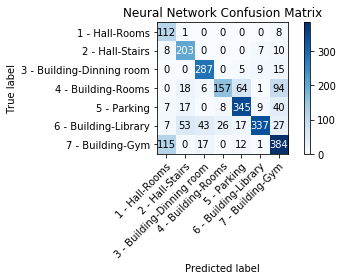

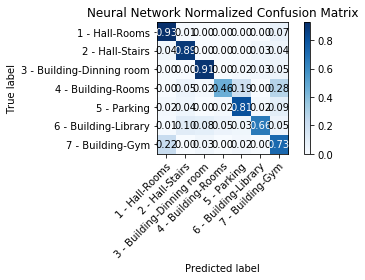

In [10]:
"""
This function has been implemented as the sklearn guide 'Confusion Matrix' says
and has fragments of its code. You can see the base function in this URL:

https://scikit-learn.org/stable/auto_examples/model_selection/
plot_confusion_matrix.html
#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

"""
def plot_confusion_matrix(classes,
                          confusion_matrix,
                          title=None,
                          normalize=False,
                          cmap=plt.cm.Blues):
    plt.rcParams["axes.grid"] = False
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Confusion matrix to np Array
    cm = np.array(confusion_matrix)
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
  
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def confusion_matrix_analisis(confusion_matrix):
    totalImages = 0
    tp = 0
    for diag,labelResults in enumerate(confusion_matrix):
        tp = tp + int(labelResults[diag])
        for j in labelResults:
            totalImages = totalImages + int(j)
    print("Total Images: " + str(totalImages))
    print("True positives: " + str(tp))
    print("Accuracy: " + str(tp/totalImages))

plot_confusion_matrix(classes=['1 - Hall-Rooms', '2 - Hall-Stairs', '3 - Building-Dinning room', '4 - Building-Rooms', '5 - Parking', '6 - Building-Library','7 - Building-Gym'], 
                      confusion_matrix = confusionMatrix, title='Neural Network Confusion Matrix', normalize=False)

plot_confusion_matrix(classes=['1 - Hall-Rooms', '2 - Hall-Stairs', '3 - Building-Dinning room', '4 - Building-Rooms', '5 - Parking', '6 - Building-Library','7 - Building-Gym'], 
                      confusion_matrix = confusionMatrix, title='Neural Network Normalized Confusion Matrix', normalize=True)

confusion_matrix_analisis(confusion_matrix = confusionMatrix)